<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_4/M04W01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 12.7MB/s]


# ***Exercise Alpha: mini Batch - Linear Regression***

In [6]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
  return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mse(y, y_hat):
  return (y_hat - y)**2

def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2*(y_hat - y)
  return dl_db

def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - lr*dl_dwi
  return wi

def update_weight_b(b, dl_db, lr):
  b = b - lr*dl_db
  return b

def compute_loss_mae(y_hat, y):
  return abs(y_hat-y)


def implement_linear_regression(X_data, y_data, batch_size, epoch_max = 50, lr=0.00001):
  # get weight for xi
  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  losses = []
  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total  = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0
    for i in range(0, N, batch_size):
      for j in range(batch_size):
        # get sample
        x1 = X_data[0][i]
        x2 = X_data[1][i]
        x3 = X_data[2][i]

        y = y_data[i]

        # compute output
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)

        # compute Loss
        loss = compute_loss_mae(y,  y_hat)
        loss_total += loss

        # compute gradient
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db = compute_gradient_b(y, y_hat)

        # Sum of dw_dwi
        dw1_total += dl_dw1
        dw2_total += dl_dw2
        dw3_total += dl_dw3
        db_total += dl_db

      # calculate average dl_dwi and dl_db
      avg_dl_dw1 = dw1_total/batch_size
      avg_dl_dw2 = dw2_total/batch_size
      avg_dl_dw3 = dw3_total/batch_size
      avg_dl_db = db_total/batch_size

      # Update wi
      w1 = update_weight_wi(w1, avg_dl_dw1, lr)
      w2 = update_weight_wi(w2, avg_dl_dw2, lr)
      w3 = update_weight_wi(w3, avg_dl_dw3, lr)
      b =  update_weight_b(b, avg_dl_db, lr)

      losses.append(loss)
  return {"w1": w1,
          "w2": w2,
          "w3": w3,
          "b": b,
          "Losses":losses}



# ***Exercise 1: Prepare Data***

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def get_column(data, index):
  result = [sample[index] for sample in data]
  return result

def prepare_data(file_name_dataset):
  data =  np.genfromtxt(file_name_dataset,
                     delimiter=",",
                     skip_header=1).tolist()

  N = len(data)
  # Get TV column (index = 0)
  tv_data = get_column(data, 0)

  # get radio (index = 1)
  radio_data = get_column(data, 1)

  # get newpaper (index = 2)
  newspaper_data = get_column(data, 2)

  # get sales (index = 3)
  sales_data = get_column(data, 3)

  # building X input and y ouput for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data

  return X, y


In [36]:
X, y = prepare_data("/content/advertising.csv")
list = [sum(X [0][:5]) , sum(X [1][:5]) , sum(X [2][:5]) , sum(y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


# ***Exercise 2: One sample - linear regression***

Exercise 2.1

In [37]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b


Exercise 2.2

In [38]:
def predict(x1, x2, x3, w1, w2, w3, b):
  return w1*x1 + w2*x2 + w3*x3 + b

y_pred = predict (x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5 , w3 =0, b =0.5)
print (y_pred)


1.0


Exercise 2.3

In [39]:
def compute_loss_mse(y, y_hat):
  return (y_hat - y)**2
l = compute_loss_mse ( y_hat =1, y =0.5)
print (l)


0.25


Exercise 2.4

In [40]:
def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2*(y_hat - y)
  return dl_db

g_wi = compute_gradient_wi (xi =1.0 , y=1.0 , y_hat =0.5)
g_b = compute_gradient_b (y=2.0 , y_hat =0.5)
print (g_b)
print ( g_wi )


-3.0
-1.0


In [41]:
def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - lr*dl_dwi
  return wi

def update_weight_b(b, dl_db, lr):
  b = b - lr*dl_db
  return b

after_wi = update_weight_wi (wi =1.0 , dl_dwi = -0.5 , lr = 0.00001)
after_b = update_weight_b (b=0.5 , dl_db = -1.0 , lr = 0.00001)
print ( after_b )
print ( after_wi )

0.50001
1.000005


Exercise 2.6: Implementation

In [42]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr=0.00001):
  # get weight for xi
  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  losses = []
  for epoch in range(epoch_max):
    for i in range(N):
      # get sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      # compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      # compute Loss
      loss = compute_loss_mse(y,  y_hat)

      # compute gradient
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      # Update wi
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b =  update_weight_b(b, dl_db, lr)
      losses.append(loss)
  return {"w1": w1,
          "w2": w2,
          "w3": w3,
          "b": b,
          "Losses":losses}


{'w1': 0.07406060193114233, 'w2': 0.15917556461755697, 'w3': 0.01756208012466229, 'b': 0.13906239317931138, 'Losses': [620.5261537274966, 6.437483164783322, 24.72298573351803, 13.563699851965337, 2.716434755040935, 0.3754993545184789, 20.874845579307767, 1.6182902207877068, 15.057731427187349, 15.072814195952093, 36.290876674174086, 2.936847980797474, 4.322702726128028, 29.545303191541326, 9.923057626083015, 7.341512698415874, 3.9671048344710496, 13.866159621876387, 27.59571351145084, 5.7995190707045765, 7.755548662798955, 0.7872218845627861, 1.8775204287203235, 7.51683580285046, 9.532052911302875, 42.997646080287495, 34.48951894754822, 7.466925695460323, 13.302672939550238, 9.594826031768921, 3.585040689055373, 7.083049455961624, 29.041785762133856, 6.773031434982613, 33.94820855377717, 9.084210140453004, 87.49513563496436, 2.4796890066468116, 3.4978103351559953, 45.95398270536748, 2.546858494517257, 1.0190444215083672, 3.434340367442081, 10.67879524402964, 6.697799972479754, 0.140348

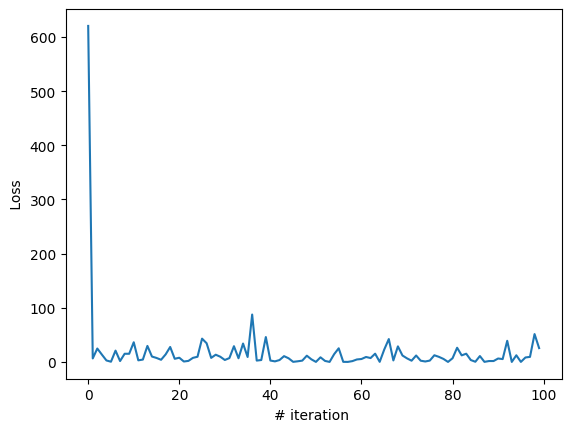

In [43]:
res= implement_linear_regression (X,y)
print(res)
plt . plot ( res["Losses"][:100])
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [44]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data("/content/advertising.csv")
res = implement_linear_regression(X, y)

sales_pred = predict(x1=tv,x2= radio, x3=newspaper, w1=res["w1"], w2=res["w2"], w3=res["w3"], b=res["b"])
print("Predicted sales: ", sales_pred)

Predicted sales:  8.176459003748658


Exercise 2.7: Loss MAE

In [22]:
def compute_loss_mae(y_hat, y):
  return abs(y_hat-y)
los= compute_loss_mae(y_hat=1, y=0.5)
print(los)

0.5


# ***Exercise 3: Batch N samples- Linear Regression***

{'w1': 0.0671185652815297, 'w2': 0.15726437362859524, 'w3': 0.029780346701521944, 'b': 0.01588303827555626, 'Losses': [349.92723222739755, 68.85822151544535, 24.301663113482785, 17.06833091214958, 15.729794328351414, 15.327066991962392, 15.077539247249815, 14.857559180192549, 14.64745114348326, 14.44395014745383, 14.246385521686882, 14.054500803248539, 13.868109603456558, 13.687041161705924, 13.51113161103945, 13.34022246068796, 13.174160221699275, 13.01279621717577, 12.855986425756743, 12.703591334333339, 12.555475796082149, 12.411508893077935, 12.271563803250974, 12.135517671538036, 12.003251485092466, 11.8746499524252, 11.749601386352767, 11.627997590632415, 11.509733750167838, 11.394708324673488, 11.282822945688109, 11.173982316832118, 11.068094117206597, 10.965068907834906, 10.864820041051077, 10.767263572742026, 10.67231817735385, 10.579905065574884, 10.489947904611427, 10.402372740974245, 10.317107925696789, 10.234084041908616, 10.15323383468969, 10.074492143133623, 9.9977958345

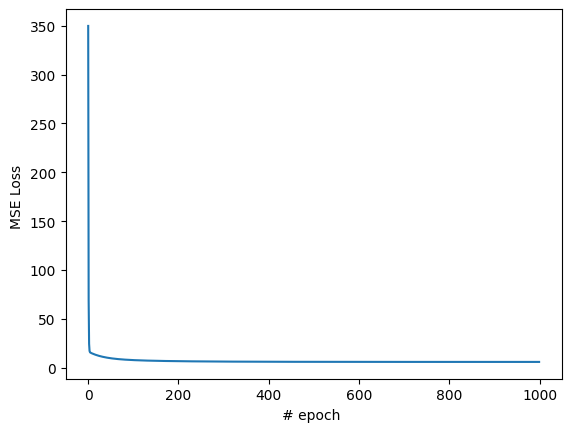

In [54]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0
  return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
  return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mse(y, y_hat):
  return (y_hat - y)**2

def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2*(y_hat - y)
  return dl_db

def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - lr*dl_dwi
  return wi

def update_weight_b(b, dl_db, lr):
  b = b - lr*dl_db
  return b

def compute_loss_mae(y_hat, y):
  return abs(y_hat-y)


def implement_linear_regression_nsamples(X_data, y_data, epoch_max, lr):
  # get weight for xi
  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  losses = []
  for epoch in range(epoch_max):
    loss_total = 0.0
    dw1_total  = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0
    for i in range(N):
        # get sample
        x1 = X_data[0][i]
        x2 = X_data[1][i]
        x3 = X_data[2][i]

        y = y_data[i]

        # compute output
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)

        # compute Loss
        loss = compute_loss_mse(y,  y_hat)
        loss_total += loss

        # compute gradient
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db = compute_gradient_b(y, y_hat)

        # Accumulate gradient of dl_dwi, dl_db
        dw1_total += dl_dw1
        dw2_total += dl_dw2
        dw3_total += dl_dw3
        db_total += dl_db

    # calculate average dl_dwi and dl_db
    avg_dl_dw1 = dw1_total/N
    avg_dl_dw2 = dw2_total/N
    avg_dl_dw3 = dw3_total/N
    avg_dl_db = db_total/N

    # Update wi
    w1 = update_weight_wi(w1, avg_dl_dw1, lr)
    w2 = update_weight_wi(w2, avg_dl_dw2, lr)
    w3 = update_weight_wi(w3, avg_dl_dw3, lr)
    b =  update_weight_b(b, avg_dl_db, lr)
    # Update Loss
    losses.append(loss_total/N)

  return {"w1": w1,
          "w2": w2,
          "w3": w3,
          "b": b,
          "Losses":losses}

X_data, y_data = prepare_data("/content/advertising.csv")
result = implement_linear_regression_nsamples (X_data, y_data,epoch_max =1000 ,lr = 0.00001)
print ( result)
plt . plot ( result["Losses"] )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

# ***Exercise 4: Rewrite Linear regression***

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.338737595565302


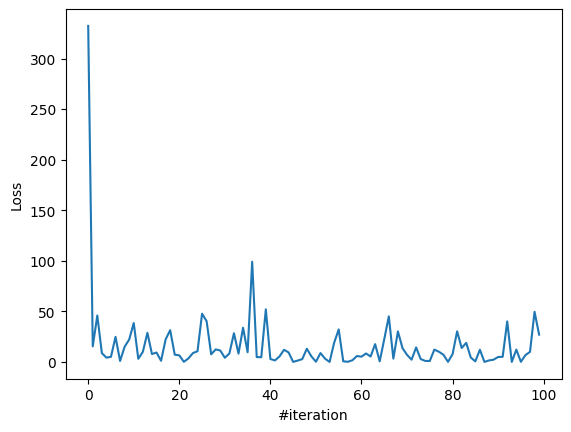

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def get_column(data, index):
  result = [sample[index] for sample in data]
  return result

def prepare_Data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header= 1).tolist()

  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  # Buiding X input and y output for training
  # Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data

  return X, y

def initialize_params():
  bias = 0
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)

  return [bias, w1, w2, w3]


def predict(X_features, weight):
  result = sum(X_features[i]* weight[i] for i in range(len(weight)))
  return result

def compute_loss(y_hat, y):
  return (y_hat - y)**2

def compute_gradient_w(X_features, y, y_hat):
  dl_dweights = [2*X_features[i]*(y_hat - y) for i in range(len(X_features))]
  return dl_dweights

def update_weight(weights, dl_dweights, lr):
  weights = [weights[i] - lr*dl_dweights[i] for i in range(len(weights))]
  return weights

def implement_linear_regression_extended(X_feature, y_output, epoch_max, lr):
  losses = []
  weights = initialize_params()
  N = len(y_output)
  for epoch in range(epoch_max): # Change: Iterate over epoch_max instead of N
    print("epoch", epoch)
    for i in range(N):
      # get a sample - row i
      feature_i = X_feature[i]
      y = y_output[i] # Change: Use y_output instead of y_data

      # compute output
      y_hat = predict(feature_i, weights)

      # compute loss
      loss = compute_loss(y_hat, y)

      # compute gradient w1, w2, w3, b
      dl_dweight = compute_gradient_w(feature_i, y, y_hat)

      # update parameters
      weights = update_weight(weights, dl_dweight, lr)

      # logging
      losses.append(loss)

  return weights, losses

X, y = prepare_Data("/content/advertising.csv")
W, L = implement_linear_regression_extended(X, y, epoch_max=50, lr=0.00001)
print(L[9999])
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()